In [59]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
import seaborn as sns
#sns.set(style="darkgrid")

In [27]:
heart=pd.read_csv('processed.cleveland.data',header=None)

In [28]:
heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [29]:
heart.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'target']
heart.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [30]:
heart.target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

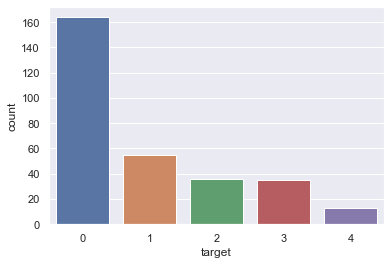

In [31]:
sns.countplot(x="target",data=heart)
plt.show()

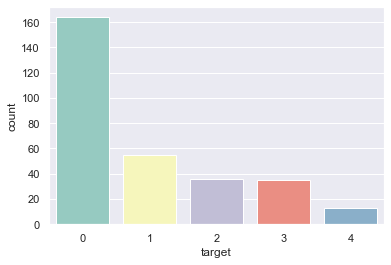

In [32]:
sns.countplot(x="target",data=heart,palette="Set3") # paletter="brw"
plt.show()

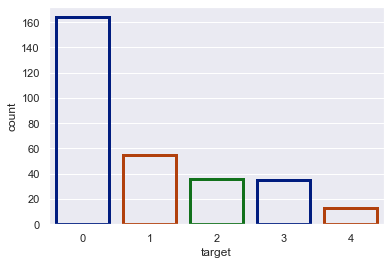

In [33]:
sns.countplot(x="target", data=heart,
             facecolor=(0,0,0,0),
             linewidth=3,
             edgecolor=sns.color_palette("dark",3))

In [34]:
heart.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
target       int64
dtype: object

In [35]:
countNoDisease=len(heart[heart.target == 0])
countHaveDisease=len(heart[heart.target != 0])
print(f"Percentage of patients with Heart Disease {countNoDisease/(len(heart.target))*100}")
print(countNoDisease)
print(len(heart.target))

Percentage of patients with Heart Disease 54.12541254125413
164
303


sns.countplot(x='sex', data=heart, palette="mako_r")
plt.xlabel("sex( 0 = female , 1 = male)")
plt.show

In [36]:
heart['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [37]:
heart['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [38]:
len(heart.loc[(heart['ca'] == '?') | (heart['thal'] == '?')])

6

In [39]:
heart_with_no_missing = heart.loc[(heart['ca'] != '?') & (heart['thal'] != '?')]
final=heart_with_no_missing
print(len(final))
print(len(heart))

297
303


In [40]:
final['ca'].unique() # there is no '?'

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

# splitting the data

In [41]:
x=final.drop('target',axis=1).copy() # using copy() ensures that the original data is unchanged.
x.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [42]:
y=final['target'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64

In [43]:
pd.get_dummies(x, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [44]:
X_encoded = pd.get_dummies(x, columns=['cp',
                                       'restecg',
                                       'slope', 
                                       'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [45]:
y_not_zero=y >0
y[y_not_zero]=1
y.unique()


array([0, 1], dtype=int64)

In [46]:
## formating data done

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn import metrics
from sklearn.decomposition import PCA # to perform PCA to plot the data

x_train , x_test, y_train , y_test = train_test_split(x,y, random_state=42)
x_train_scaled=scale(x_train)
x_test_scaled=scale(x_test)


In [48]:
clf_svm = SVC(random_state=42)
clf_svm.fit(x_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

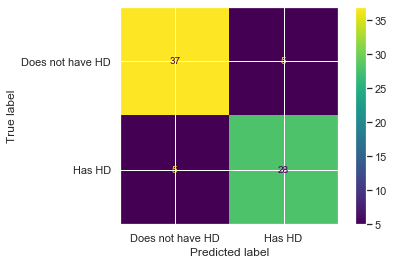

In [49]:
c=metrics.plot_confusion_matrix(clf_svm, 
                      x_test_scaled, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

In [55]:
param_grid=[{'C':[1,10,100,1000],
            'gamma':[0.001,0.0001],
            'kernel':['rbf']},
           ]
optimal_params=GridSearchCV(SVC(),
                           param_grid,
                           cv=5,
                           verbose=0) # To check what GridSeaarchCV is doing we can set the verbose to 2
optimal_params.fit(x_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [56]:
#Using Principal Component Analysis for dimensionality reduction

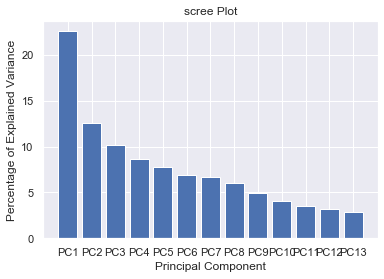

In [74]:
pca=PCA() # PCA centers the data but doesnot scale it
x_train_pca=pca.fit_transform(x_train_scaled)

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=['PC'+ str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var ,tick_label=labels)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('scree Plot')
plt.show()

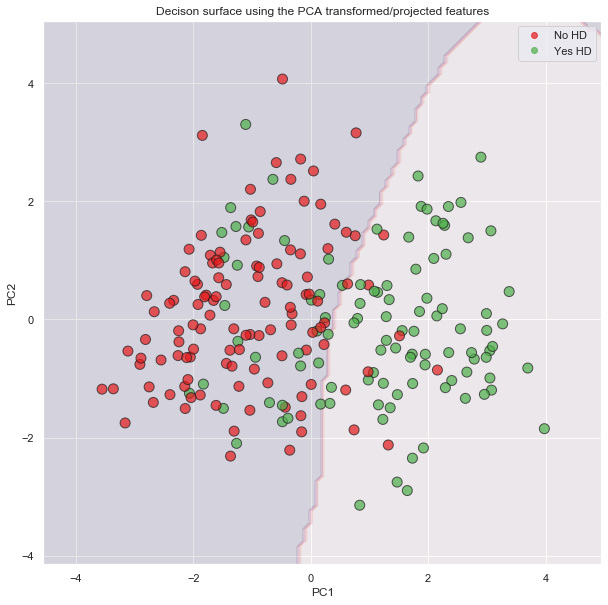

In [83]:
pc1=x_train_pca[:,0]
pc2=x_train_pca[:,1]
clf_svm.fit(np.column_stack((pc1, pc2)), y_train)

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
## now darw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 
scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm.png')
plt.show()

In [82]:
print(x_train_pca[:,0])

[ 0.24880949 -1.4367953  -1.88177489 -2.68073218 -2.24417841  0.10643415
  1.55649873  1.87932187  0.83381171  3.05012047 -1.37600697  0.00731936
  2.1302505  -0.7308139   3.37787585  1.72690668  2.14609657 -0.48211255
 -0.48896673 -2.06489932  0.98502057 -0.33342775 -1.86343578  0.13399571
  1.19368874  0.30320988 -2.33436983  0.83926484 -1.03663312 -1.78067785
 -0.89085164  1.66820362 -0.17298105  0.79591422 -1.71674342  1.0671283
  1.28725495  1.2979627  -1.80708995  2.23953578 -1.03257359  1.75688019
  2.65758608  3.04833586 -1.92830563  0.59495798  1.97750161  2.15632478
  1.95053585  3.26695833 -1.02648514 -1.2628607  -0.07459892 -0.17213505
  1.78886252 -0.16767306  2.6804338  -1.47588382  2.39987897  1.85120227
  2.27898265  3.09553205 -1.54402219 -0.44587907  2.78393952  2.89652289
  0.53780768  2.5569337  -2.75164619 -1.8276347   1.47036892  1.98027919
 -1.92023695  2.63240639  0.17006873  0.35210671  1.94599417 -1.05725879
  0.97969576  2.99061193 -0.31835326 -2.24948491 -0.